<a href="https://colab.research.google.com/github/acaversa/Challenge-Telecom-X-analise-de-evasao-de-clientes-_P2/blob/main/TeleconX_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1️⃣ Importar bibliotecas essenciais

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

2️⃣ Carregar os dados tratados

In [130]:
# Carregar diretamente do GitHub
url = 'https://raw.githubusercontent.com/acaversa/Challenge-Telecom-X-analise-de-evasao-de-clientes-_P2/main/dados_tratados.csv'
df = pd.read_csv(url)

# Visualizar as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account,contract,monthly_charges,total_charges
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",NaN,NaN,NaN
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",NaN,NaN,NaN
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",NaN,NaN,NaN
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",NaN,NaN,NaN
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",NaN,NaN,NaN


3️⃣ Explorar os dados


In [131]:
# Informações gerais
df.info()

# Verificar valores nulos
df.isnull().sum()

# Estatísticas básicas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7267 non-null   object 
 1   Churn            7043 non-null   object 
 2   customer         7267 non-null   object 
 3   phone            7267 non-null   object 
 4   internet         7267 non-null   object 
 5   account          7267 non-null   object 
 6   contract         0 non-null      float64
 7   monthly_charges  0 non-null      float64
 8   total_charges    0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 511.1+ KB


,contract,monthly_charges,total_charges
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


4️⃣ Análise de correlação entre variáveis numéricas

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


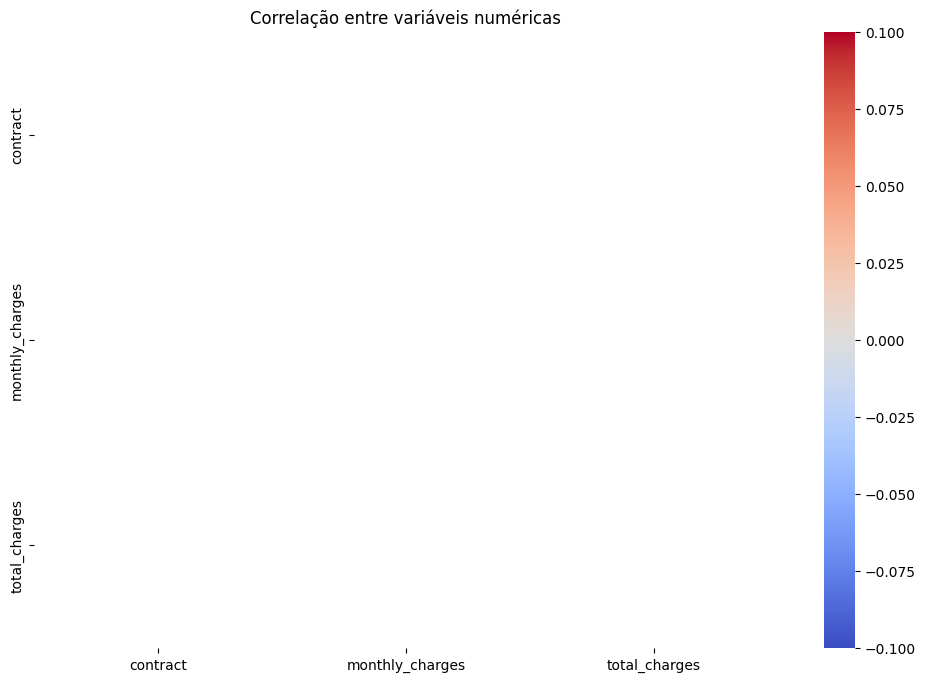

In [132]:
# Selecionar apenas colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()